# Model Training

In [1]:
import os
os.chdir('..')

In [118]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from itertools import product
from src.data_preprocessing import df_construct, add_eng_values, alter_term_gender
from src.model_training import build_preprocessor, build_full_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, recall_score, roc_curve, auc
from src.model_training import save_model
import matplotlib.pyplot as plt

In [3]:
excel_file = pd.ExcelFile('data/raw_data/D2lData.xlsx')

# Reading each sheet into a DataFrame
df_d2l = pd.read_excel(excel_file, 'd2l')
df_demo = pd.read_excel(excel_file, 'demographics')
df_grades = pd.read_excel(excel_file, 'grades')

In [4]:
df = df_construct(df_d2l, df_demo, df_grades)

In [9]:
# Save this cleaned dataframe to the data/processed_data folder for future use.
df.to_csv('data/processed_data/df_clean.csv', index=False)

In [38]:
# Use this code in the event that it's needed
# df = pd.read_csv('data/processed_data/df_clean.csv')

In [13]:
X = df.drop('at_risk', axis=1)
y = df.at_risk

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

In [16]:
preprocessor = build_preprocessor(numeric_features, categorical_features)

## Model 1: RandomForestClassifier

In [17]:
model_rfc = RandomForestClassifier()
pipeline_rfc = build_full_pipeline(preprocessor, model_rfc)

In [18]:
# Fit the pipeline to your training data
pipeline_rfc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       inverse_func=<ufunc 'expm1'>))]),
                                                  ['content_required',
                                                   'checklist_completed',
                                                   'discussion_post_read',
                                                   'number_of_assignment_submissions',
                                                   'total_time_sp...
                                                   'age', 'total_course_count',
                                                   'course_count_by_term',
                                                   'completion_ratio',
                                                   'logins_per_course',
                                                   'avg_time_per_login',
                                                   'avg_time_by_completed_content',
                                                   'quiz_attempts_per_quiz']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['term', 'pseudo_course',
                                                   'gender', 'imm_status'])])),
                ('model', RandomForestClassifier())])

In [19]:
# Predictions
y_pred_rfc = pipeline_rfc.predict(X_test)

### Evaluate RandomForestClassifier

#### Here we will check the accuracy, precision, recall, and f1-score, along with a confusion matrix

In [20]:
# Evaluate the model
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
classification_rep_rfc = classification_report(y_test, y_pred_rfc)
conf_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)

print(f"Accuracy: {accuracy_rfc}")
print("Classification Report:\n", classification_rep_rfc)
print('\nConfusion Matrix:\n', conf_matrix_rfc)

Accuracy: 0.9670958512160229
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1322
           1       1.00      0.39      0.57        76

    accuracy                           0.97      1398
   macro avg       0.98      0.70      0.77      1398
weighted avg       0.97      0.97      0.96      1398


Confusion Matrix:
 [[1322    0]
 [  46   30]]


## Model 2: GradientBoostingClassifier

In [21]:
model_gbc = GradientBoostingClassifier()
pipeline_gbc = build_full_pipeline(preprocessor, model_gbc)

In [22]:
# Fit the pipeline to your training data
pipeline_gbc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>,
                                                                                       inverse_func=<ufunc 'expm1'>))]),
                                                  ['content_required',
                                                   'checklist_completed',
                                                   'discussion_post_read',
                                                   'number_of_assignment_submissions',
                                                   'total_time_sp...
                                                   'age', 'total_course_count',
                                                   'course_count_by_term',
                                                   'completion_ratio',
                                                   'logins_per_course',
                                                   'avg_time_per_login',
                                                   'avg_time_by_completed_content',
                                                   'quiz_attempts_per_quiz']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['term', 'pseudo_course',
                                                   'gender', 'imm_status'])])),
                ('model', GradientBoostingClassifier())])

In [23]:
# Predictions
y_pred_gbc = pipeline_gbc.predict(X_test)

### Evaluate GradientBoostingClassifier

#### Here we will check the accuracy, precision, recall, and f1-score, along with a confusion matrix

In [24]:
# Evaluate the model
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
classification_rep_gbc = classification_report(y_test, y_pred_gbc)
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)

print(f"Accuracy: {accuracy_gbc}")
print("Classification Report:\n", classification_rep_gbc)
print('\nConfusion Matrix:\n', conf_matrix_gbc)

Accuracy: 0.9706723891273248
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1322
           1       0.91      0.51      0.66        76

    accuracy                           0.97      1398
   macro avg       0.94      0.76      0.82      1398
weighted avg       0.97      0.97      0.97      1398


Confusion Matrix:
 [[1318    4]
 [  37   39]]


## Observations

- We can see that, while the accuracy is very high, we do not have the recall values we'd like to see for the under-represented group.
- In this instance, since we aim to identify at-risk students, we would be willing to risk having more False Positives in order to minimize on the False Negatives.  In other words, it's far less problematic to have a student who is not at-risk be incorrectly identified as at risk than it is to have students who are actually at-risk not identified.
- Let's check some other classification models to find out how they perform out of the box on this imbalanced dataset.


# Testing Other Classifiers

#### We've also included a dictionary that logs which entries(rows) are False Negatives for each of the classifiers.  Since this dataset is quite imbalanced, we will need to try various techniques in order to increase the recall rate.  By collecting the false negatives, we can hopefully get an idea of why these entries are difficult to classify correctly.

In [25]:
# Define classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=400),
    'RidgeRegression': RidgeClassifier(),
    'NaiveBayes': GaussianNB(),
    'NeuralNetwork': MLPClassifier(max_iter=400),
    'XGBoost': xgb.XGBClassifier()
    
}

# Create an empty dictionary to store False Negatives for each classifier
false_negatives_dict = {}

# Create an empty list to store DataFrames for each classifier
false_negatives_dfs = []

# Iterate through classifiers
for clf_name, clf in classifiers.items():
    pipeline = build_full_pipeline(preprocessor, clf)
    grid_search = GridSearchCV(pipeline, {}, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    y_pred = grid_search.predict(X_test)

    # Identify False Negatives
    false_negatives = (y_test == 1) & (y_pred == 0)

    # Extract indices of False Negatives
    fn_indices = np.where(false_negatives)[0]
    
    # Extract False Negatives entries from the DataFrame
    fn_entries = X_test[false_negatives]

    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Append False Negatives entries to the list
    fn_entries_copy = fn_entries.copy()
    fn_entries_copy['Classifier'] = clf_name
    false_negatives_dfs.append(fn_entries_copy)
    
    # Store False Negatives indices in the dictionary
    false_negatives_dict[clf_name] = fn_indices

    print(f"{clf_name}\n")
    print(f"Accuracy: {accuracy}\n")
    print("Classification Report:\n", classification_rep)
    print('Confusion Matrix:\n', conf_matrix)
    print(f'False Negatives Indices: {fn_indices}')
    print("------------------------------------------------------------------\n")

# Concatenate all DataFrames into a single DataFrame
false_negatives_df = pd.concat(false_negatives_dfs, ignore_index=True)

RandomForest

Accuracy: 0.9649499284692418

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1322
           1       0.97      0.37      0.53        76

    accuracy                           0.96      1398
   macro avg       0.97      0.68      0.76      1398
weighted avg       0.96      0.96      0.96      1398

Confusion Matrix:
 [[1321    1]
 [  48   28]]
False Negatives Indices: [   3   20   40  138  151  178  201  233  307  325  392  409  412  457
  481  527  539  542  578  668  696  698  716  734  778  792  794  848
  891  902  906  962  979 1038 1059 1061 1105 1108 1241 1245 1250 1272
 1283 1318 1327 1341 1378 1396]
------------------------------------------------------------------

GradientBoosting

Accuracy: 0.969241773962804

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1322
           1       0.87      0.51      0.

/Users/jlo/anaconda3/envs/newenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jlo/anaconda3/envs/newenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jlo/anaconda3/envs/newenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM

Accuracy: 0.9456366237482118

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1322
           1       0.00      0.00      0.00        76

    accuracy                           0.95      1398
   macro avg       0.47      0.50      0.49      1398
weighted avg       0.89      0.95      0.92      1398

Confusion Matrix:
 [[1322    0]
 [  76    0]]
False Negatives Indices: [   3   13   20   30   40   41   72  132  138  151  178  201  233  279
  307  309  325  353  389  392  402  409  412  417  440  457  481  527
  539  542  558  578  583  668  673  678  696  698  716  734  778  792
  794  848  891  894  902  906  916  962  979 1019 1038 1059 1061 1069
 1096 1103 1105 1108 1117 1139 1179 1241 1245 1249 1250 1272 1275 1283
 1318 1327 1341 1346 1378 1396]
------------------------------------------------------------------

KNN

Accuracy: 0.957796852646638

Classification Report:
               precision    rec

/Users/jlo/anaconda3/envs/newenv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression

Accuracy: 0.9549356223175965

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1322
           1       0.71      0.29      0.41        76

    accuracy                           0.95      1398
   macro avg       0.84      0.64      0.69      1398
weighted avg       0.95      0.95      0.95      1398

Confusion Matrix:
 [[1313    9]
 [  54   22]]
False Negatives Indices: [   3   20   30   40  132  138  151  178  201  233  307  325  389  392
  409  412  457  481  527  539  542  578  583  696  698  716  734  778
  792  794  848  891  902  906  962  979 1038 1059 1061 1103 1108 1117
 1241 1245 1249 1250 1272 1283 1318 1327 1341 1346 1378 1396]
------------------------------------------------------------------

RidgeRegression

Accuracy: 0.9556509298998569

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1322
     

## Observations
- Again, we see that most models have a very high accuracy, but many have a recall rate of less than 50% for the under-represented class.
- Naive Bayes has the best Recall, but this comes at the cost of having a significant decrease to accuracy and recall for the over-represented class.  While it is unfeasible to misclassify half of the student population as at-risk, maybe we can leverage this model's predictions in an ensemble model.
- The Nueral Network, GradientBoost, and XGBoost models are showing some signs of hope as well, all with recall values of > 50%.

### Moving Forward
- We will have to try tuning some of these models, combined with other methods that can deal with imbalanced datasets in our hyperparameter_tuning notebook.
- Before the hyperparameter tuning, we will take a closer look at the dictionary of false negatives we created to determine if we can find out more about the entries that are not being classified properly.  This investigation can be found in the EDA notebook.

In [26]:
# Save false_negatives_dict and df to a file in order to use in the EDA notebook
with open('data/processed_data/false_negatives_dict.pkl', 'wb') as file:
    pickle.dump(false_negatives_dict, file)
    
false_negatives_df.to_csv('data/processed_data/false_negatives_df.csv', index=False)

# Creating A Stack Model

#### This model combines the top 3 performing models from aboveL XGBoost, Naive Bayes, and Neural Net.  From above, we can see that both the Neural Net and XGBoost had a couple of the better recall scores for the under-represented class, except for the Naive Bayes, which had the best recall score overall (at the cost of many False Positives).

#### We've included class_weights to combat the imbalance in the dataset

#### This first pass will not include any hyperparameter tuning to get a baseline of what we can achieve with this stack.

In [41]:
# Define class weights
class_weights = {
    0: 0.05,
    1: 0.95,
}

# Update base classifiers with class weights
xgb_model = build_full_pipeline(preprocessor, xgb.XGBClassifier())
nb_model = build_full_pipeline(preprocessor, GaussianNB()) 
nn_model = build_full_pipeline(preprocessor, MLPClassifier(max_iter=400))

# Update meta-classifier with class weights
meta_classifier = RandomForestClassifier(class_weight=class_weights)

# Create the stacking classifier with class weights
stacking_classifier = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('nn', nn_model),
        ('nb', nb_model)
    ],
    final_estimator=meta_classifier,
    cv=5  # Number of cross-validation folds
)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
stack_pred = stacking_classifier.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, stack_pred)
classification_rep = classification_report(y_test, stack_pred)
conf_matrix = confusion_matrix(y_test, stack_pred)
print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", classification_rep)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.9649499284692418

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1322
           1       0.75      0.53      0.62        76

    accuracy                           0.96      1398
   macro avg       0.86      0.76      0.80      1398
weighted avg       0.96      0.96      0.96      1398

Confusion Matrix:
 [[1309   13]
 [  36   40]]


### Results:
- This is performing about the same as XGBoost and Neural Net did above.

## Retraining the Stacked Model (with hypertuned XGBoost and Neural Net)
- The models loaded in are the tuned models from the "hyperparameter_tuning" notebook
- We will see if we can improve on the prior baseline stacked model with these tuned models

In [78]:
# Load saved models and best parameters
best_model_xgb = joblib.load('models/best_model_xgb_roc.pkl')
best_model_nn = joblib.load('models/best_model_nn_f1.pkl')

In [54]:
# Define class weights
class_weights = {
    0: 0.1,
    1: 0.9
}

# Base Classifiers
xgb_model = best_model_xgb
nb_model = build_full_pipeline(preprocessor, GaussianNB())
nn_model = best_model_nn

# Update meta-classifier with class weights
meta_classifier = RandomForestClassifier(class_weight=class_weights)

# Create the stacking classifier with class weights
stacking_classifier = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('nn', nn_model),
        ('nb', nb_model)
    ],
    final_estimator=meta_classifier,
    cv=5  # Number of cross-validation folds
)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
stack_pred = stacking_classifier.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, stack_pred)
classification_rep = classification_report(y_test, stack_pred)
conf_matrix = confusion_matrix(y_test, stack_pred)
print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", classification_rep)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.9649499284692418

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1322
           1       0.73      0.57      0.64        76

    accuracy                           0.96      1398
   macro avg       0.85      0.78      0.81      1398
weighted avg       0.96      0.96      0.96      1398

Confusion Matrix:
 [[1306   16]
 [  33   43]]


### Results:
- We can an improvement for recall, however, it's not enough to say that this model is our best model, especially considering the tuned xgboost model alone has a recall of 78% for the at-risk class.

# Creating a Voting Classifier

#### Let's try another ensemble model, this time a voting classifier.  In this case, we hope to draw on the strengths (and weaknesses) of the various classifiers to create a more well-rounded model.

#### For the first pass, we'll try a combination of 4 classifiers - XGBoost, Naive Bayes, Neural Net, and Gradient Boost.  We will use the un-tuned models first
#### Since the Naive Bayes has the highest recall on the under-represented class, we'll give it a voting weight of 2, with all the others a weight of 1

In [64]:
# Create individual models
xgb_model = build_full_pipeline(preprocessor, xgb.XGBClassifier())
nb_model = build_full_pipeline(preprocessor, GaussianNB())
nn_model = build_full_pipeline(preprocessor, MLPClassifier(max_iter=400))
gb_model = build_full_pipeline(preprocessor, GradientBoostingClassifier())

In [65]:
# Build a VotingClassifier with custom weights
custom_weights = [2, 1, 1, 1]  #classifier_weights
ensemble_model = VotingClassifier(
    estimators=[('nb', nb_model), ('nn', nn_model), ('xgb', xgb_model), ('gb', gb_model)],
    voting='soft',  
    weights=custom_weights
)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions
ensemble_predictions = ensemble_model.predict(X_test)

In [66]:
# Evaluate Performance
accuracy = accuracy_score(y_test, ensemble_predictions)
classification_rep = classification_report(y_test, ensemble_predictions)
conf_matrix = confusion_matrix(y_test, ensemble_predictions)
print(f"Accuracy: {accuracy}\n")
print("Classification Report:\n", classification_rep)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.9484978540772532

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      1322
           1       0.52      0.76      0.62        76

    accuracy                           0.95      1398
   macro avg       0.75      0.86      0.79      1398
weighted avg       0.96      0.95      0.95      1398

Confusion Matrix:
 [[1268   54]
 [  18   58]]


### Observations:
- This is a pretty good recall value for the under-represented class for using out-of-box models.  Let's see if we can do better by changing the weights for each of the classifiers.

# Trying Multiple Classifiers and Weights

#### Let's loop through multiple classifier and weight combinations to see if we can find the "best" combination for the voting classifier.

#### **NOTE**: This chunk of code takes quite a while to run, so I've included the output afterwards.

In [70]:
# Create individual models
xgb_model = build_full_pipeline(preprocessor, xgb.XGBClassifier())
nb_model = build_full_pipeline(preprocessor, GaussianNB())
nn_model = build_full_pipeline(preprocessor, MLPClassifier(max_iter=400))
gb_model = build_full_pipeline(preprocessor, GradientBoostingClassifier())
rf_model = build_full_pipeline(preprocessor, RandomForestClassifier())

In [71]:
# List of classifiers and their names
classifiers = [nb_model, nn_model, xgb_model, gb_model, rf_model]
classifier_names = ['nb', 'nn', 'xgb', 'gb', 'rf']

# Range of weights (0 to 2, inclusive)
weight_values = [0, 1, 2]

# Store the top five weight combinations along with their roc_auc scores
combinations = []

# Iterate over all possible weight combinations
for weight_combination in product(weight_values, repeat=len(classifiers)):
    # Ensure at least one weight for nb_model and not all weights are zero
    if weight_combination[classifier_names.index('nb')] > 0 and any(weight_combination):
        # Build the ensemble model with custom weights
        ensemble_model = VotingClassifier(
            estimators=list(zip(classifier_names, classifiers)),
            voting='soft',
            weights=weight_combination
        )

        # Fit the ensemble model on the training data
        ensemble_model.fit(X_train, y_train)

        # Make predictions
        ensemble_predictions = ensemble_model.predict(X_test)

        # Evaluate Performance (using roc_auc score)
        roc_auc = roc_auc_score(y_test, ensemble_predictions)
        
        # Store the weight combination and roc_auc score
        combinations.append((weight_combination, roc_auc))

# Sort and retrieve the top five combinations based on roc_auc
combinations.sort(key=lambda x: x[1], reverse=True)
top_five_combinations = combinations[:5]

# Print the top three weight combinations and their roc_auc scores
for combination, roc_auc in top_five_combinations:
    print(f"Weight Combination: {combination}, ROC_AUC: {roc_auc}")

/Users/jlo/anaconda3/envs/newenv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Weight Combination: (2, 1, 1, 0, 1), ROC_AUC: 0.8728003821960347
Weight Combination: (2, 1, 0, 0, 2), ROC_AUC: 0.8697746635878651
Weight Combination: (2, 2, 1, 0, 0), ROC_AUC: 0.8696253682618041
Weight Combination: (2, 1, 1, 1, 0), ROC_AUC: 0.864559280197468
Weight Combination: (2, 1, 0, 1, 1), ROC_AUC: 0.8615335615892986


### Results:
For models (NB, NN, XGB, GB, RF), the weights for the top 5 ROC_AUC combination scores:
- Weight Combination: (2, 1, 1, 0, 1), ROC_AUC: 0.8728003821960347
- Weight Combination: (2, 1, 0, 0, 2), ROC_AUC: 0.8697746635878651
- Weight Combination: (2, 2, 1, 0, 0), ROC_AUC: 0.8696253682618041
- Weight Combination: (2, 1, 1, 1, 0), ROC_AUC: 0.864559280197468
- Weight Combination: (2, 1, 0, 1, 1), ROC_AUC: 0.8615335615892986

## Trying the top 3 combinations:

#### 1. Weight Combination: (NB=2, NN=1, XGB=1, GB=0, RF=1)

In [72]:
# Build a VotingClassifier with custom weights
custom_weights = [2, 1, 1, 0, 1]  #classifier_weights
ensemble_model = VotingClassifier(
    estimators=[('nb', nb_model),
                ('nn', nn_model),
                ('xgb', xgb_model),
                ('gb', gb_model),
                ('rf', rf_model)],
    voting='soft',  
    weights=custom_weights
)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions
ensemble_predictions = ensemble_model.predict(X_test)

In [73]:
# Evaluate Performance
accuracy = accuracy_score(y_test, ensemble_predictions)
classification_rep = classification_report(y_test, ensemble_predictions)
conf_matrix = confusion_matrix(y_test, ensemble_predictions)
roc_auc = roc_auc_score(y_test, ensemble_predictions)
print(f"Accuracy: {accuracy}\n")
print(f"ROC_AUC: {roc_auc}\n")
print("Classification Report:\n", classification_rep)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.9434907010014306

ROC_AUC: 0.8833107731507286

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1322
           1       0.49      0.82      0.61        76

    accuracy                           0.94      1398
   macro avg       0.74      0.88      0.79      1398
weighted avg       0.96      0.94      0.95      1398

Confusion Matrix:
 [[1257   65]
 [  14   62]]


#### 2. Weight Combination: (NB=2, NN=1, XGB=0, GB=0, RF=2)

In [74]:
# Build a VotingClassifier with custom weights
custom_weights = [2, 1, 0, 0, 2]  #classifier_weights
ensemble_model = VotingClassifier(
    estimators=[('nb', nb_model),
                ('nn', nn_model),
                ('xgb', xgb_model),
                ('gb', gb_model),
                ('rf', rf_model)],
    voting='soft',  
    weights=custom_weights
)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions
ensemble_predictions = ensemble_model.predict(X_test)

In [75]:
# Evaluate Performance
accuracy = accuracy_score(y_test, ensemble_predictions)
classification_rep = classification_report(y_test, ensemble_predictions)
conf_matrix = confusion_matrix(y_test, ensemble_predictions)
roc_auc = roc_auc_score(y_test, ensemble_predictions)
print(f"Accuracy: {accuracy}\n")
print(f"ROC_AUC: {roc_auc}\n")
print("Classification Report:\n", classification_rep)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.9427753934191703

ROC_AUC: 0.8643303606975077

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1322
           1       0.48      0.78      0.60        76

    accuracy                           0.94      1398
   macro avg       0.74      0.86      0.78      1398
weighted avg       0.96      0.94      0.95      1398

Confusion Matrix:
 [[1259   63]
 [  17   59]]


#### 3. Weight Combination: (NB=2, NN=2, XGB=1, GB=0, RF=0)

In [76]:
# Build a VotingClassifier with custom weights
custom_weights = [2, 2, 1, 0, 0]  #classifier_weights
ensemble_model = VotingClassifier(
    estimators=[('nb', nb_model),
                ('nn', nn_model),
                ('xgb', xgb_model),
                ('gb', gb_model),
                ('rf', rf_model)],
    voting='soft',  
    weights=custom_weights
)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions
ensemble_predictions = ensemble_model.predict(X_test)

In [77]:
# Evaluate Performance
accuracy = accuracy_score(y_test, ensemble_predictions)
classification_rep = classification_report(y_test, ensemble_predictions)
conf_matrix = confusion_matrix(y_test, ensemble_predictions)
roc_auc = roc_auc_score(y_test, ensemble_predictions)
print(f"Accuracy: {accuracy}\n")
print(f"ROC_AUC: {roc_auc}\n")
print("Classification Report:\n", classification_rep)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.9399141630901288

ROC_AUC: 0.8566167688510231

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1322
           1       0.47      0.76      0.58        76

    accuracy                           0.94      1398
   macro avg       0.73      0.86      0.77      1398
weighted avg       0.96      0.94      0.95      1398

Confusion Matrix:
 [[1256   66]
 [  18   58]]


### Results:
- All three models are performing quite similarly, with a recall of the under-represented class of ~80%.
- The first model with model and weight combination: (NB=2, NN=1, XGB=1, GB=0, RF=1) has an edge in recall on the minority class (less False Negatives)
- Let's retry these models with the results of the hyperparameter tuning

# Voting Classifiers with Tuned Models

Let's try to find the "best" weight combination again, but this time with the tuned models from the results of the hyperparameter_tuning notebook, with roc_auc as our scoring metric:

In [82]:
# Load saved tuned models
tuned_xgb_model = joblib.load('models/best_model_xgb_roc.pkl')
tuned_nn_model = joblib.load('models/best_model_nn_f1.pkl')
tuned_gb_model = joblib.load('models/best_model_gb_roc.pkl')

In [83]:
# Create base naive bayes and random forest models since the tuning of these did not yield better results.
tuned_nb_model = build_full_pipeline(preprocessor, GaussianNB())
tuned_rf_model = build_full_pipeline(preprocessor, RandomForestClassifier())                                                                    

In [84]:
# List of classifiers and their names
classifiers = [tuned_nb_model, tuned_nn_model, tuned_xgb_model, tuned_gb_model, tuned_rf_model]
classifier_names = ['nb', 'nn', 'xgb', 'gb', 'rf']

# Range of weights (0 to 3, inclusive)
weight_values = [0, 1, 2, 3]

# Store the top five weight combinations along with their roc_auc scores
combinations = []

# Iterate over all possible weight combinations
for weight_combination in product(weight_values, repeat=len(classifiers)):
    # Ensure at least one weight for nb_model and not all weights are zero
    if weight_combination[classifier_names.index('nb')] > 0 and any(weight_combination):
        # Build the ensemble model with custom weights
        ensemble_model = VotingClassifier(
            estimators=list(zip(classifier_names, classifiers)),
            voting='soft',
            weights=weight_combination
        )

        # Fit the ensemble model on the training data
        ensemble_model.fit(X_train, y_train)

        # Make predictions
        ensemble_predictions = ensemble_model.predict(X_test)

        # Evaluate Performance on roc_auc score
        roc_auc = roc_auc_score(y_test, ensemble_predictions)
        
        # Store the weight combination and roc_auc score
        combinations.append((weight_combination, roc_auc))

# Sort and retrieve the top five combinations based on roc_auc score
combinations.sort(key=lambda x: x[1], reverse=True)
top_five_combinations = combinations[:5]

# Print the top five weight combinations and their roc_auc scores
for combination, roc_auc in top_five_combinations:
    print(f"Weight Combination: {combination}, ROC_AUC: {roc_auc}")

Weight Combination: (2, 0, 3, 0, 0), ROC_AUC: 0.8991161716697189
Weight Combination: (2, 0, 3, 1, 0), ROC_AUC: 0.8880782705629429
Weight Combination: (1, 1, 3, 1, 0), ROC_AUC: 0.8875507604108608
Weight Combination: (1, 0, 2, 0, 0), ROC_AUC: 0.8865654112588583
Weight Combination: (1, 1, 3, 0, 0), ROC_AUC: 0.8841468269766701


### Results:
For models (NB, NN, XGB, GB, RF), the weights for the top 5 ROC_AUC combination scores:
- Weight Combination: (2, 0, 3, 0, 0), ROC_AUC: 0.8991161716697189
- Weight Combination: (2, 0, 3, 1, 0), ROC_AUC: 0.8880782705629429
- Weight Combination: (1, 1, 3, 1, 0), ROC_AUC: 0.8875507604108608
- Weight Combination: (1, 0, 2, 0, 0), ROC_AUC: 0.8865654112588583
- Weight Combination: (1, 1, 3, 0, 0), ROC_AUC: 0.8841468269766701

After testing all of these results, it appears that the first weight combination produces the best recall for the under-represented class, while also minimizing the False Positives to a reasonable level.  Below is our model build with these weights:

In [112]:
# Build a VotingClassifier with custom weights
custom_weights = [2, 0, 3, 0, 0]  #classifier_weights
ensemble_model = VotingClassifier(
    estimators=[('nb', tuned_nb_model), 
                ('nn', tuned_nn_model), 
                ('xgb', tuned_xgb_model), 
                ('gb', tuned_gb_model),
                ('rf', tuned_rf_model)],
    voting='soft',  
    weights=custom_weights
)

# Fit the ensemble model on the training data
ensemble_model.fit(X_train, y_train)

# Make predictions
ensemble_predictions = ensemble_model.predict(X_test)

In [129]:
# Evaluate Performance
accuracy = accuracy_score(y_test, ensemble_predictions)
classification_rep = classification_report(y_test, ensemble_predictions)
roc_auc = roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, ensemble_predictions)
print(f"Accuracy: {accuracy}\n")
print(f"ROC_AUC Score: {roc_auc}\n")
print("Classification Report:\n", classification_rep)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.949928469241774

ROC_AUC Score: 0.9391870371844893

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      1322
           1       0.52      0.84      0.65        76

    accuracy                           0.95      1398
   macro avg       0.76      0.90      0.81      1398
weighted avg       0.97      0.95      0.96      1398

Confusion Matrix:
 [[1264   58]
 [  12   64]]


ROC AUC Score: 0.9391870371844893



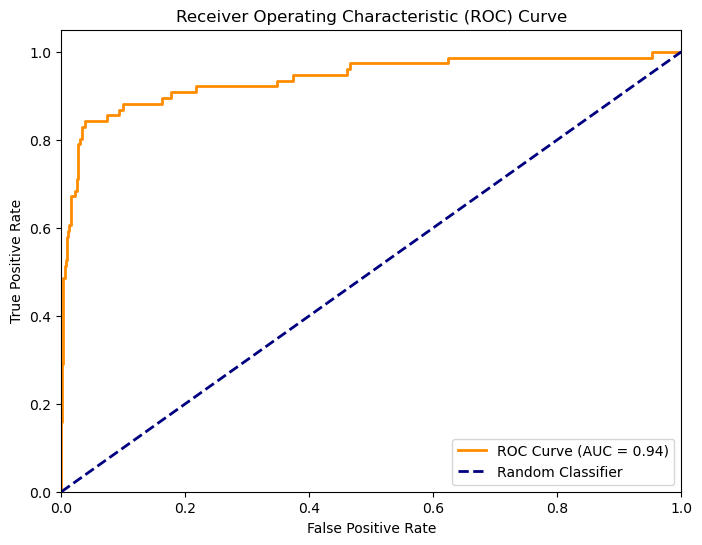

In [127]:
# Calculate ROC score
roc_score = roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1])  # Assuming the positive class is 1
print(f"ROC AUC Score: {roc_score}\n")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ensemble_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Saving the Model

In [114]:
# Save this model
save_model(ensemble_model, file_path='models/voting_classifier_best_model.pkl')